## Preparing the data

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [151]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv2'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, revMeans, revIntns = [],[],[],[]
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2
['C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_1046', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p13_s1_2017-02-22_1102', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p16_s2_2017-02-18_1401', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p17_s1_2017-02-18_1452', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p18_s2_2017-02-18_1703', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p19_s2_2017-02-20_1333', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p1_s2_2017-02-21_1439', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p20_s1_2017-02-21_1508', 'C:\\Users\\Egor\\Dropbox\\Projects\\mc\\data\\mc2_tgT-mcBv2\\mc2_tgT-mcBv2_cent_p2_s1_2017-02-23_11

In [152]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = np.array(thisStair.reversalIntensities) #detectRevs(thisStair)
        theseRevIntns[theseRevIntns<-4] = np.nan
        #print np.round(theseRevIntns,1)
        revIntns.append(theseRevIntns[-8:])
        revMeans.append([np.average(theseRevIntns[-4:]),
                         np.average(theseRevIntns[-6:]),
                         np.average(theseRevIntns[-8:])])
        thisStairStart = thisStair.extraInfo['startContr']
        if thisStairStart < -2:
            thisStairStart = -2
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    #'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStairStart]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_1046
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p13_s1_2017-02-22_1102
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p16_s2_2017-02-18_1401
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p17_s1_2017-02-18_1452
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p18_s2_2017-02-18_1703
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p19_s2_2017-02-20_1333
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p1_s2_2017-02-21_1439
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p20_s1_2017-02-21_1508
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p2_s1_2017-02-23_1144
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\mc2_tgT-mcBv2_cent_p9_s1_2017-02-20_1039
C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv2\m

In [153]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) # + '_' + \
                      #'tgV-' + stairs.targV.astype(str)
stairs.ix[stairs.stairStart<-2,'stairStart'] = -2
print stairs.shape
print stairs.columns
stairs.head(5)

(420, 29)
Index([u'expName', u'expPara', u'time', u'participant', u'dom', u'session',
       u'nRevs', u'mcSz', u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap',
       u'mcPeriFade', u'targSz', u'targSf', u'targOri1', u'targOri2',
       u'targXoff1', u'targXoff2', u'targYoff', u'targV', u'targTtot',
       u'targTpeak', u'trialT', u'fixCross', u'stairLabel', u'stairStart',
       u'meanRev6', u'condLabel'],
      dtype='object')


,expName,expPara,time,participant,dom,session,nRevs,mcSz,mcSf,mcBv,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,meanRev6,condLabel
0,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,0.0,-1.545000,mcBv-0.01_tgT-0.66_tgEcc-28
1,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.33,2,1,st0.0_mcBv0.01_targTpeak0.33,0.0,-1.418333,mcBv-0.01_tgT-0.33_tgEcc-28
2,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.66,2,1,st-2.5_mcBv0.01_targTpeak0.66,-2.0,-1.596667,mcBv-0.01_tgT-0.66_tgEcc-28
3,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,0.33,2,1,st-2.5_mcBv0.01_targTpeak0.33,-2.0,-1.396667,mcBv-0.01_tgT-0.33_tgEcc-28
4,mc2_tgT-mcBv2,cent,2017-02-18_1046,0,0,1,10,256,0.1,0.01,...,0,0,0.66,1.66,2,1,st-2.5_mcBv0.01_targTpeak1.66,-2.0,-1.696667,mcBv-0.01_tgT-1.66_tgEcc-28


In [154]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(420L,)
(420L,)
(420L, 3L)
(420, 5)


,mcBv,participant,stairStart,targTpeak,targXoff2
0,0.01,0,0.0,0.66,28
1,0.01,0,0.0,0.33,28
2,0.01,0,-2.0,0.66,28
3,0.01,0,-2.0,0.33,28
4,0.01,0,-2.0,1.66,28


In [155]:
print np.shape(revMeans)
meanRevsDF = pd.DataFrame({
    'meanRevs4': np.array(revMeans)[:,0],
    'meanRevs6': np.array(revMeans)[:,1],
    'meanRevs8': np.array(revMeans)[:,2] })
orderedRevMeans = pd.concat([meanRevsDF, orderInfo], axis=1)
#orderedRevMeans.head(5)
stairsWithRevs = pd.merge(orderedRevMeans, stairs, on=['participant','mcBv','targTpeak',
                                                       'targXoff2', 'stairStart'])
stairsWithRevs.head(5)

(420L, 3L)


,meanRevs4,meanRevs6,meanRevs8,mcBv,participant,stairStart,targTpeak,targXoff2,expName,expPara,...,targOri2,targXoff1,targYoff,targV,targTtot,trialT,fixCross,stairLabel,meanRev6,condLabel
0,-1.5175,-1.545000,-1.52125,0.01,0,0.0,0.66,28,mc2_tgT-mcBv2,cent,...,0,-28,0,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.66,-1.545000,mcBv-0.01_tgT-0.66_tgEcc-28
1,-1.4775,-1.418333,-1.43875,0.01,0,0.0,0.33,28,mc2_tgT-mcBv2,cent,...,0,-28,0,0,0.66,2,1,st0.0_mcBv0.01_targTpeak0.33,-1.418333,mcBv-0.01_tgT-0.33_tgEcc-28
2,-1.5950,-1.596667,-1.58500,0.01,0,-2.0,0.66,28,mc2_tgT-mcBv2,cent,...,0,-28,0,0,0.66,2,1,st-2.5_mcBv0.01_targTpeak0.66,-1.596667,mcBv-0.01_tgT-0.66_tgEcc-28
3,-1.2950,-1.396667,-1.43500,0.01,0,-2.0,0.33,28,mc2_tgT-mcBv2,cent,...,0,-28,0,0,0.66,2,1,st-2.5_mcBv0.01_targTpeak0.33,-1.396667,mcBv-0.01_tgT-0.33_tgEcc-28
4,-1.6950,-1.696667,-1.73500,0.01,0,-2.0,1.66,28,mc2_tgT-mcBv2,cent,...,0,-28,0,0,0.66,2,1,st-2.5_mcBv0.01_targTpeak1.66,-1.696667,mcBv-0.01_tgT-1.66_tgEcc-28


In [156]:
ptntMeans = stairsWithRevs.groupby(['participant'])['meanRevs4','meanRevs6','meanRevs8'].mean()
ptntMeans['participant'] = ptntMeans.index.get_level_values('participant')
ptntMeans = ptntMeans.reset_index(drop=True)
ptntMeans.columns = ['ptnt4','ptnt6','ptnt8','participant']
ptntMeans.head()

,ptnt4,ptnt6,ptnt8,participant
0,-1.532562,-1.524208,-1.533469,0
1,-1.281438,-1.284292,-1.292594,1
2,-0.947000,-0.964667,-0.966625,2
3,-1.251125,-1.249083,-1.250875,9
4,-1.432062,-1.418458,-1.405094,13


In [157]:
condRevMeans = stairsWithRevs.groupby(['condLabel','participant'])['meanRevs4','meanRevs6','meanRevs8'].mean()
#print condRevMeans.head(6)
#print condRevMeans.index.get_level_values('participant')
#print condRevMeans.index
#condRevMeans['condLabel'] = condRevMeans.index
condRevMeans['participant'] = condRevMeans.index.get_level_values('participant')
condRevMeans['condLabel'] = condRevMeans.index.get_level_values('condLabel')
condRevMeans = condRevMeans.reset_index(drop=True)
print condRevMeans.shape
condRevMeans.head(6)

(210, 5)


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel
0,-1.30500,-1.303333,-1.290000,0,mcBv-0.01_tgT-0.33_tgEcc-100
1,-1.11000,-1.090000,-1.105000,1,mcBv-0.01_tgT-0.33_tgEcc-100
2,-0.79625,-0.780833,-0.810625,2,mcBv-0.01_tgT-0.33_tgEcc-100
3,-0.98500,-0.990000,-1.011250,9,mcBv-0.01_tgT-0.33_tgEcc-100
4,-1.05500,-1.053333,-1.052500,13,mcBv-0.01_tgT-0.33_tgEcc-100
5,-1.29500,-1.280000,-1.297500,14,mcBv-0.01_tgT-0.33_tgEcc-100


In [158]:
condRevNPtntMeans = pd.merge(condRevMeans, ptntMeans, how='inner', on=['participant'])
condRevNPtntMeans['norm4'] = condRevNPtntMeans.ptnt4 / condRevNPtntMeans.meanRevs4
condRevNPtntMeans['norm6'] = condRevNPtntMeans.ptnt6 / condRevNPtntMeans.meanRevs6
condRevNPtntMeans['norm8'] = condRevNPtntMeans.ptnt8 / condRevNPtntMeans.meanRevs8
condRevNPtntMeans.head()

,meanRevs4,meanRevs6,meanRevs8,participant,condLabel,ptnt4,ptnt6,ptnt8,norm4,norm6,norm8
0,-1.30500,-1.303333,-1.290000,0,mcBv-0.01_tgT-0.33_tgEcc-100,-1.532562,-1.524208,-1.533469,1.174377,1.169469,1.188735
1,-1.38625,-1.407500,-1.436875,0,mcBv-0.01_tgT-0.33_tgEcc-28,-1.532562,-1.524208,-1.533469,1.105546,1.082919,1.067225
2,-1.50000,-1.483333,-1.468750,0,mcBv-0.01_tgT-0.66_tgEcc-100,-1.532562,-1.524208,-1.533469,1.021708,1.027556,1.044064
3,-1.55625,-1.570833,-1.553125,0,mcBv-0.01_tgT-0.66_tgEcc-28,-1.532562,-1.524208,-1.533469,0.984779,0.970318,0.987344
4,-1.53000,-1.520000,-1.515000,0,mcBv-0.01_tgT-1.0_tgEcc-100,-1.532562,-1.524208,-1.533469,1.001675,1.002769,1.012191


In [159]:
stairsClean = stairs.drop(['stairStart','meanRev6','stairLabel'],axis=1,inplace=False)
stairsClean.drop_duplicates(inplace=True)
conds = pd.merge(condRevNPtntMeans, stairsClean, how='inner', on=['condLabel','participant'])
conds['Mask\nVelocity'] = np.round(conds.mcBv * 60/35,0)
print conds.columns
conds.head(7)

Index([u'meanRevs4', u'meanRevs6', u'meanRevs8', u'participant', u'condLabel',
       u'ptnt4', u'ptnt6', u'ptnt8', u'norm4', u'norm6', u'norm8', u'expName',
       u'expPara', u'time', u'dom', u'session', u'nRevs', u'mcSz', u'mcSf',
       u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz', u'targSf',
       u'targOri1', u'targOri2', u'targXoff1', u'targXoff2', u'targYoff',
       u'targV', u'targTtot', u'targTpeak', u'trialT', u'fixCross',
       u'Mask\nVelocity'],
      dtype='object')


,meanRevs4,meanRevs6,meanRevs8,participant,condLabel,ptnt4,ptnt6,ptnt8,norm4,norm6,...,targOri2,targXoff1,targXoff2,targYoff,targV,targTtot,targTpeak,trialT,fixCross,Mask Velocity
0,-1.30500,-1.303333,-1.290000,0,mcBv-0.01_tgT-0.33_tgEcc-100,-1.532562,-1.524208,-1.533469,1.174377,1.169469,...,0,-100,100,0,0,0.66,0.33,2,1,0.0
1,-1.38625,-1.407500,-1.436875,0,mcBv-0.01_tgT-0.33_tgEcc-28,-1.532562,-1.524208,-1.533469,1.105546,1.082919,...,0,-28,28,0,0,0.66,0.33,2,1,0.0
2,-1.50000,-1.483333,-1.468750,0,mcBv-0.01_tgT-0.66_tgEcc-100,-1.532562,-1.524208,-1.533469,1.021708,1.027556,...,0,-100,100,0,0,0.66,0.66,2,1,0.0
3,-1.55625,-1.570833,-1.553125,0,mcBv-0.01_tgT-0.66_tgEcc-28,-1.532562,-1.524208,-1.533469,0.984779,0.970318,...,0,-28,28,0,0,0.66,0.66,2,1,0.0
4,-1.53000,-1.520000,-1.515000,0,mcBv-0.01_tgT-1.0_tgEcc-100,-1.532562,-1.524208,-1.533469,1.001675,1.002769,...,0,-100,100,0,0,0.66,1.00,2,1,0.0
5,-1.71750,-1.645000,-1.652500,0,mcBv-0.01_tgT-1.0_tgEcc-28,-1.532562,-1.524208,-1.533469,0.892322,0.926570,...,0,-28,28,0,0,0.66,1.00,2,1,0.0
6,-1.48875,-1.475833,-1.481875,0,mcBv-0.01_tgT-1.33_tgEcc-100,-1.532562,-1.524208,-1.533469,1.029429,1.032778,...,0,-100,100,0,0,0.66,1.33,2,1,0.0


In [160]:
mtLabels = ['Static mask\nCenter target','Static mask\nPeripheral target',
            'Dynamic mask\nCenter target','Dynamic mask\nPeripheral target']
conds.ix[(conds.targXoff2<50) & (conds.mcBv<1),'Mask/Target'] = mtLabels[0]
conds.ix[(conds.targXoff2>50) & (conds.mcBv<1),'Mask/Target'] = mtLabels[1]
conds.ix[(conds.targXoff2<50) & (conds.mcBv>1),'Mask/Target'] = mtLabels[2]
conds.ix[(conds.targXoff2>50) & (conds.mcBv>1),'Mask/Target'] = mtLabels[3]

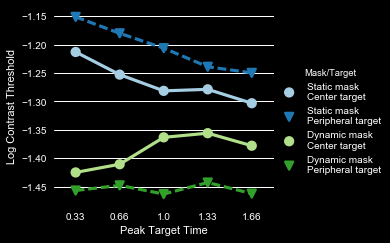

In [161]:
#sns.palplot(sns.color_palette("Paired"))
sns.set_palette('Paired')
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask/Target',  
                   data=conds, ci=None, size=3.5, aspect=1.2,
                   linestyles=['-','--','-','--'],
                   markers=['o','v','o','v'],
                   hue_order=mtLabels)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')

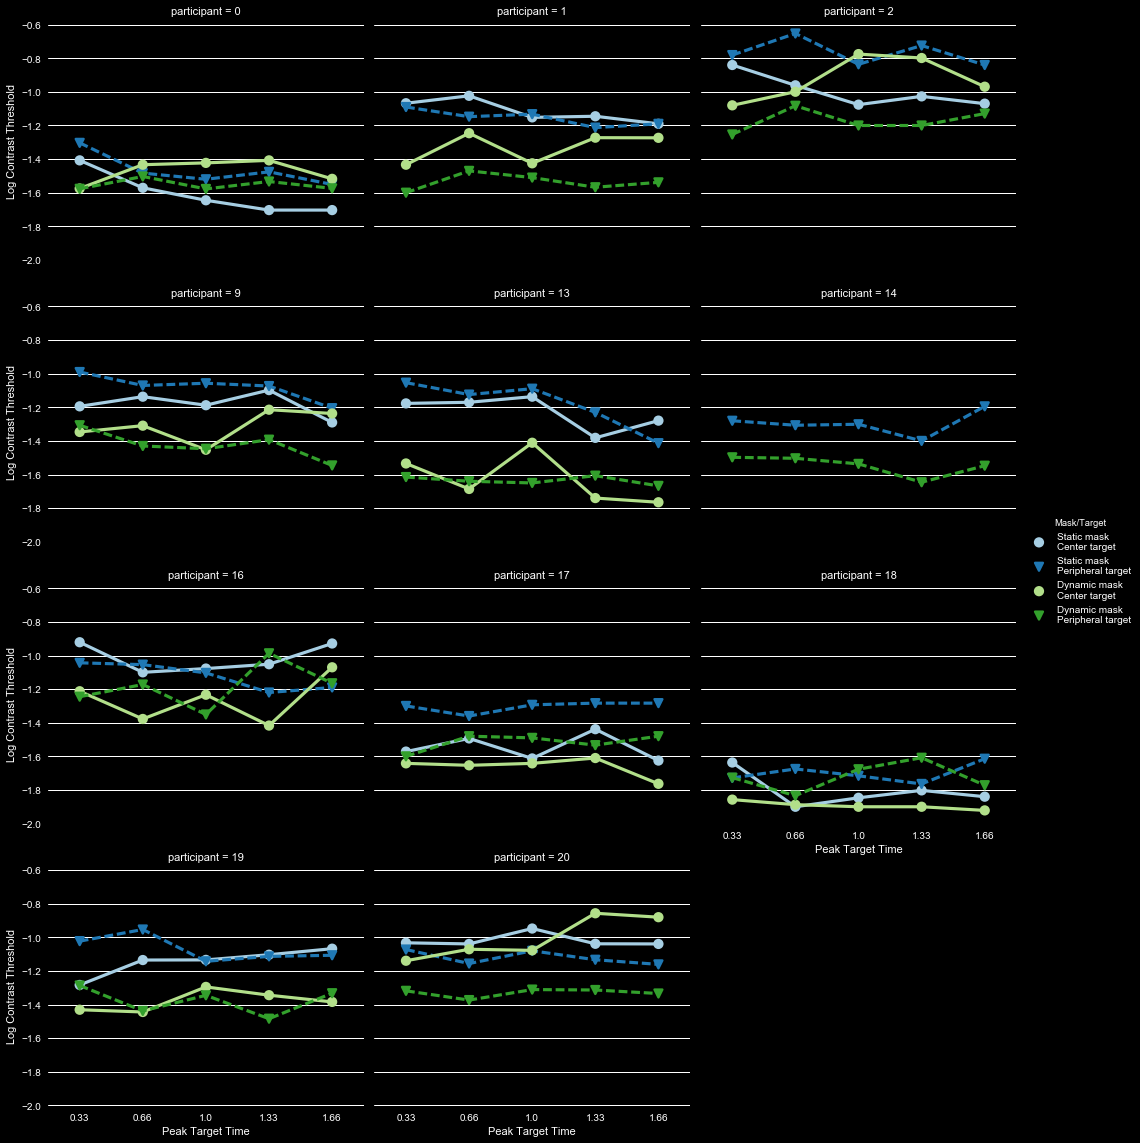

In [162]:
#sns.palplot(sns.color_palette("Paired"))
g = sns.factorplot(x='targTpeak', y='meanRevs6', hue='Mask/Target', col='participant',
                   data=conds, ci=None, aspect=1.2, col_wrap=3,
                   linestyles=['-','--','-','--'],
                   markers=['o','v','o','v'],
                   hue_order=mtLabels)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')

# Model testing

In [163]:
# include the order of the reversal intensities
colNames = ['1','2','3','4','5','6','7','8']
revIntnsDF = pd.DataFrame(revIntns, columns=colNames)
ordRevIntns = revIntnsDF.join(orderInfo.reset_index(drop=True))
df = pd.melt(ordRevIntns, id_vars=['mcBv','participant','stairStart','targTpeak', 'targXoff2'], 
             value_vars=colNames)
df = df.rename(columns={'variable': 'revN', 'value': 'revIntn'})
df.head(5)

,mcBv,participant,stairStart,targTpeak,targXoff2,revN,revIntn
0,0.01,0,0.0,0.66,28,1,-1.6
1,0.01,0,0.0,0.33,28,1,-1.8
2,0.01,0,-2.0,0.66,28,1,-1.4
3,0.01,0,-2.0,0.33,28,1,-1.4
4,0.01,0,-2.0,1.66,28,1,-1.7


## Zero reference

In [164]:
df.head()

,mcBv,participant,stairStart,targTpeak,targXoff2,revN,revIntn
0,0.01,0,0.0,0.66,28,1,-1.6
1,0.01,0,0.0,0.33,28,1,-1.8
2,0.01,0,-2.0,0.66,28,1,-1.4
3,0.01,0,-2.0,0.33,28,1,-1.4
4,0.01,0,-2.0,1.66,28,1,-1.7


In [165]:
df0 = pd.DataFrame()
df0['participant'] = df.participant
df0.ix[df.targXoff2<50, 'targEcc'] = 0
df0.ix[df.targXoff2>50, 'targEcc'] = 1
#df0['targV'] = df.targV/np.max(df.targV) # 0=static, 1=dynamic
df0.ix[df.mcBv==.01, 'mcBv'] = 0 # 0=static mask; 1=slow mask; 2=fast mask
df0.ix[df.mcBv==9.6, 'mcBv'] = 1
df0['targOnset'] = np.round((df.targTpeak - .33)/1.33,2) # 0=onset in the beginning
#df0['targOnset'] = df.targTpeak - .33 # 0=onset in the beginning
df0['stairStart'] = (df.stairStart+2)/2 # 0=low start; 1=high start
df0['revN'] = df.revN
df0['revIntn'] = df.revIntn
df0.reset_index(drop=True, inplace=True)
#df0.revIntn = df0.revIntn.interpolate()
df0.head(10)

,participant,targEcc,mcBv,targOnset,stairStart,revN,revIntn
0,0,0.0,0.0,0.25,1.0,1,-1.6
1,0,0.0,0.0,0.00,1.0,1,-1.8
2,0,0.0,0.0,0.25,0.0,1,-1.4
3,0,0.0,0.0,0.00,0.0,1,-1.4
4,0,0.0,0.0,1.00,0.0,1,-1.7
5,0,0.0,1.0,0.25,0.0,1,-1.4
6,0,0.0,1.0,0.75,1.0,1,-1.6
7,0,0.0,1.0,0.50,1.0,1,-1.6
8,0,0.0,1.0,0.00,0.0,1,-1.4
9,0,0.0,1.0,0.50,0.0,1,-1.2


In [166]:
import statsmodels as sm
import statsmodels.formula.api as smf

The model with all three mask speeds.

In [167]:
md = smf.mixedlm('revIntn ~ targEcc * mcBv * targOnset + stairStart', df0, missing='drop', groups=df0['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     revIntn
No. Observations:      3360        Method:                 REML   
No. Groups:            11          Scale:                  0.0570 
Min. group size:       160         Likelihood:             -9.7904
Max. group size:       320         Converged:              Yes    
Mean group size:       305.5                                      
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept              -1.259    0.069 -18.368 0.000 -1.393 -1.124
targEcc                 0.079    0.020   3.915 0.000  0.040  0.119
mcBv                   -0.190    0.021  -9.206 0.000 -0.231 -0.150
targEcc:mcBv           -0.105    0.029  -3.669 0.000 -0.161 -0.049
targOnset              -0.099    0.024  -4.151 0.000 -0.146 -0.052
targEcc:t

In [168]:
#print dir(mdf)
#print mdf.params
mds = pd.DataFrame({
        'targEcc' : np.repeat([0,1],10),
        'mcBv' : np.tile(np.repeat([0,1],5),2), 
        'targOnset' : np.round(np.tile(np.linspace(0,1.33,5),4),2)
    })
mds['contrast'] = mdf.params['Intercept'] + \
    mdf.params['mcBv']*mds.mcBv + \
    mdf.params['targOnset']*mds.targOnset + \
    mdf.params['mcBv:targOnset']*mds.mcBv*mds.targOnset + \
    mdf.params['targEcc']*mds.targEcc + \
    mdf.params['targEcc:mcBv']*mds.targEcc*mds.mcBv + \
    mdf.params['targEcc:targOnset']*mds.targEcc*mds.targOnset + \
    mdf.params['targEcc:mcBv:targOnset']*mds.targEcc*mds.mcBv*mds.targOnset
mds['targTpeak'] = mds.targOnset + 0.33
mds.ix[mds.mcBv==0, 'Mask\nVelocity'] = 0
mds.ix[mds.mcBv==1, 'Mask\nVelocity'] = 16
mds.head(5)

,mcBv,targEcc,targOnset,contrast,targTpeak,Mask Velocity
0,0,0,0.00,-1.258784,0.33,0.0
1,0,0,0.33,-1.291495,0.66,0.0
2,0,0,0.66,-1.324206,0.99,0.0
3,0,0,1.00,-1.357909,1.33,0.0
4,0,0,1.33,-1.390620,1.66,0.0


In [169]:
mds.ix[(mds.targEcc==0) & (mds.mcBv==0),'Mask/Target'] = mtLabels[0]
mds.ix[(mds.targEcc==1) & (mds.mcBv==0),'Mask/Target'] = mtLabels[1]
mds.ix[(mds.targEcc==0) & (mds.mcBv==1),'Mask/Target'] = mtLabels[2]
mds.ix[(mds.targEcc==1) & (mds.mcBv==1),'Mask/Target'] = mtLabels[3]
mds.head(5)

,mcBv,targEcc,targOnset,contrast,targTpeak,Mask Velocity,Mask/Target
0,0,0,0.00,-1.258784,0.33,0.0,Static mask\nCenter target
1,0,0,0.33,-1.291495,0.66,0.0,Static mask\nCenter target
2,0,0,0.66,-1.324206,0.99,0.0,Static mask\nCenter target
3,0,0,1.00,-1.357909,1.33,0.0,Static mask\nCenter target
4,0,0,1.33,-1.390620,1.66,0.0,Static mask\nCenter target


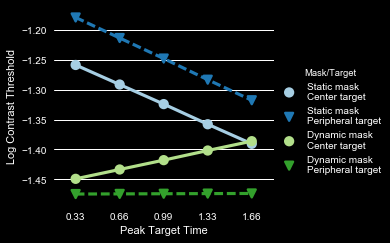

In [170]:
sns.set_palette(sns.color_palette('Paired'))
g = sns.factorplot(x='targTpeak', y='contrast', hue='Mask/Target',  
                   data=mds, ci=None, size=3.5, aspect=1.2,
                   linestyles=['-','--','-','--'],
                   markers=['o','v','o','v'],
                   hue_order=mtLabels)
g.set_axis_labels('Peak Target Time','Log Contrast Threshold')

## True centering

In [171]:
df.head()

,mcBv,participant,stairStart,targTpeak,targXoff2,revN,revIntn
0,0.01,0,0.0,0.66,28,1,-1.6
1,0.01,0,0.0,0.33,28,1,-1.8
2,0.01,0,-2.0,0.66,28,1,-1.4
3,0.01,0,-2.0,0.33,28,1,-1.4
4,0.01,0,-2.0,1.66,28,1,-1.7


In [172]:
dfC = pd.DataFrame()
dfC['participant'] = df.participant
dfC.ix[df.targXoff2<50, 'targEcc'] = -1
dfC.ix[df.targXoff2>50, 'targEcc'] = 1
dfC.ix[df.mcBv==.01, 'mcBv'] = -1 # 0=static mask; 1=slow mask; 2=fast mask
dfC.ix[df.mcBv==9.6, 'mcBv'] = 1
dfC['targOnset'] = 2*(df.targTpeak - .33)-1 # 0=onset in the beginning
dfC['stairStart'] = df.stairStart+1 # -1=low start; 1=high start
dfC['revN'] = df.revN
dfC['revIntn'] = df.revIntn
#dfC.revIntn = dfC.revIntn.interpolate()
dfC.head(10)

,participant,targEcc,mcBv,targOnset,stairStart,revN,revIntn
0,0,-1.0,-1.0,-0.34,1.0,1,-1.6
1,0,-1.0,-1.0,-1.00,1.0,1,-1.8
2,0,-1.0,-1.0,-0.34,-1.0,1,-1.4
3,0,-1.0,-1.0,-1.00,-1.0,1,-1.4
4,0,-1.0,-1.0,1.66,-1.0,1,-1.7
5,0,-1.0,1.0,-0.34,-1.0,1,-1.4
6,0,-1.0,1.0,1.00,1.0,1,-1.6
7,0,-1.0,1.0,0.34,1.0,1,-1.6
8,0,-1.0,1.0,-1.00,-1.0,1,-1.4
9,0,-1.0,1.0,0.34,-1.0,1,-1.2


The model with all three mask speeds.

In [173]:
md = smf.mixedlm('revIntn ~ targEcc * mcBv * targOnset + stairStart', dfC, groups=dfC['participant'])
#print sm.stats.anova.anova_lm(md0,md)
mdf = md.fit()
print(mdf.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     revIntn 
No. Observations:     3360        Method:                 REML    
No. Groups:           11          Scale:                  0.0570  
Min. group size:      160         Likelihood:             -19.8932
Max. group size:      320         Converged:              Yes     
Mean group size:      305.5                                       
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept              -1.328    0.067 -19.828 0.000 -1.459 -1.196
targEcc                 0.009    0.004   1.943 0.052 -0.000  0.017
mcBv                   -0.098    0.004 -22.375 0.000 -0.106 -0.089
targEcc:mcBv           -0.030    0.004  -6.886 0.000 -0.039 -0.022
targOnset              -0.015    0.004  -3.318 0.001 -0.023 -0.006
targEcc:t